<a href="https://colab.research.google.com/github/lashkoEv/Deep_learning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf
import numpy as np 

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Формування словника


In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt

--2022-12-26 03:38:26--  https://storage.googleapis.com/tensorflow-1-public/course3/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt’

irish-lyrics-eof.tx 100%[===================>]  67.35K   395KB/s    in 0.2s    

2022-12-26 03:38:27 (395 KB/s) - ‘irish-lyrics-eof.txt’ saved [68970/68970]



In [3]:
data = open('./irish-lyrics-eof.txt').read()

# Приведення до нижнього регістру і розділення на список речень
corpus = data.lower().split("\n")
corpus

['come all ye maidens young and fair', 'and you that are blooming in your prime', 'always beware and keep your garden fair', 'let no man steal away your thyme', 'for thyme it is a precious thing', 'and thyme brings all things to my mind', 'nlyme with all its flavours, along with all its joys', 'thyme, brings all things to my mind', 'once i and a bunch of thyme', 'i thought it never would decay', 'then came a lusty sailor', 'who chanced to pass my way', 'and stole my bunch of thyme away', 'the sailor gave to me a rose', 'a rose that never would decay', 'he gave it to me to keep me reminded', 'of when he stole my thyme away', 'sleep, my child, and peace attend thee', 'all through the night', 'guardian angels god will send thee', 'soft the drowsy hours are creeping', 'hill and dale in slumber sleeping', 'i my loving vigil keeping', 'while the moon her watch is keeping', 'while the weary world is sleeping', 'oer thy spirit gently stealing', 'visions of delight revealing', 'breathes a pure 

# Tokenizer

In [4]:
tokenizer = Tokenizer()

# Створення словника індексів
tokenizer.fit_on_texts(corpus)

# Визначення загальної кількості слів + 1 для індексу `0` (маркер заповнення)
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'thro

# Попередня обробка датасету

In [5]:
# Ініціалізація списку послідовностей
input_sequences = []

for line in corpus:
	# Токенізувати поточний рядок
	token_list = tokenizer.texts_to_sequences([line])[0]

	# цикл для створення підфраз
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])

# заповнення усіх послідовностей
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Створення вхідних даних і лейблів шляхом поділу останнього токена у підфразах
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Конверт лейблів у one-hot масиви
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [6]:
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

token_list = []

# Знаходження токенів кожного слова та додавання їх до токен-листу
for word in sentence: 
  token_list.append(tokenizer.word_index[word])
  
print(token_list)

sample sentence: ['come', 'all', 'ye', 'maidens', 'young', 'and', 'fair']
[51, 12, 96, 1217, 48, 2, 69]


In [7]:
elem_number = 5

# Токени та фраза
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
decoded to text: ['come all ye maidens young and']
one-hot label: [0. 0. 0. ... 0. 0. 0.]
index of label: 69


In [8]:
elem_number = 4
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

token list: [   0    0    0    0    0    0    0    0    0    0   51   12   96 1217
   48]
decoded to text: ['come all ye maidens young']
one-hot label: [0. 0. 1. ... 0. 0. 0.]
index of label: 2


# Побудова, компіляція та навчання моделі

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 15, 100)           269000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 300)              301200    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 2690)              809690    
                                                                 
Total params: 1,379,890
Trainable params: 1,379,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
377/377 [==============================] - 6s 9ms/step - loss: 6.6239 - accuracy: 0.0763
Epoch 2/50
377/377 [==============================] - 3s 9ms/step - loss: 5.7216 - accuracy: 0.1194
Epoch 3/50
377/377 [======================

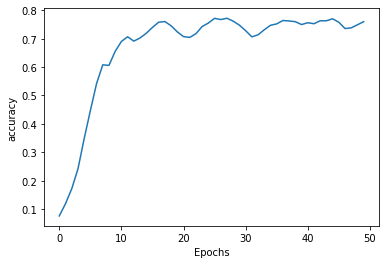

In [27]:
# Гіперпараметри
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(total_words, activation='softmax')
])

# категоріальна кросентропія, тому що це багатокласова проблема
model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )

model.summary()

history = model.fit(xs, ys, epochs=50)

plot_graphs(history, 'accuracy')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 15, 100)           269000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 300)              301200    
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 20)                6020      
                                                                 
 dense_5 (Dense)             (None, 2690)              56490     
                                                                 
Total params: 632,710
Trainable params: 632,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
377/377 [==============================] - 6s 9ms/step - loss: 6.7678 - accuracy: 0.0628
Epoch 2/50
377

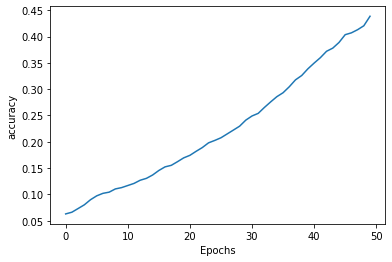

In [30]:
embedding_dim = 100
lstm_units = 150
learning_rate = 0.01

model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(20, activation='relu'),
          Dense(total_words, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
    )

history = model.fit(xs, ys, epochs=50)

plot_graphs(history, 'accuracy')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 15, 100)           269000    
                                                                 
 bidirectional_5 (Bidirectio  (None, 40)               19360     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 2690)              110290    
                                                                 
Total params: 398,650
Trainable params: 398,650
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
377/377 [==============================] - 6s 8ms/step - loss: 6.8084 - accuracy: 0.0645
Epoch 2/50
377/377 [==============================] - 3s 8ms/step - loss: 6.3184 - accuracy: 0.0657
Epoch 3/50
377/377 [==========================

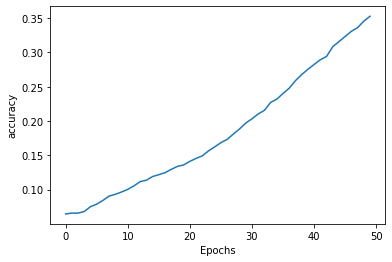

In [35]:
embedding_dim = 100
lstm_units = 20
learning_rate = 0.01

model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dense(total_words, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
    )

history = model.fit(xs, ys, epochs=50)

plot_graphs(history, 'accuracy')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 15, 100)           269000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 240)              212160    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 240)               0         
                                                                 
 dense_7 (Dense)             (None, 2690)              648290    
                                                                 
Total params: 1,129,450
Trainable params: 1,129,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
377/377 [==============================] - 6s 8ms/step - loss: 6.7462 - accuracy: 0.0635
Epoch 2/50

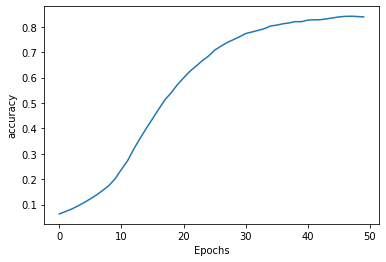

In [41]:
embedding_dim = 100
lstm_units = 120
learning_rate = 0.01

model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units)),
          Dropout(0.1),
          Dense(total_words, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
    )

history = model.fit(xs, ys, epochs=50)

plot_graphs(history, 'accuracy')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 15, 40)            107600    
                                                                 
 bidirectional_15 (Bidirecti  (None, 240)              154560    
 onal)                                                           
                                                                 
 dense_13 (Dense)            (None, 2690)              648290    
                                                                 
Total params: 910,450
Trainable params: 910,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
377/377 [==============================] - 7s 8ms/step - loss: 6.7919 - accuracy: 0.0641
Epoch 2/50
377/377 [==============================] - 3s 9ms/step - loss: 6.2828 - accuracy: 0.0732
Epoch 3/50
377/377 [=========================

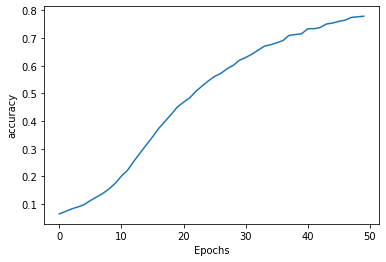

In [52]:
embedding_dim = 40
lstm_units = 120
learning_rate = 0.001

model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units, dropout=0.1)),
          Dense(total_words, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
    )

history = model.fit(xs, ys, epochs=50)

plot_graphs(history, 'accuracy')

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 15, 100)           269000    
                                                                 
 bidirectional_17 (Bidirecti  (None, 2048)             9216000   
 onal)                                                           
                                                                 
 dense_15 (Dense)            (None, 2690)              5511810   
                                                                 
Total params: 14,996,810
Trainable params: 14,996,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
377/377 [==============================] - 9s 18ms/step - loss: 6.7222 - accuracy: 0.0626
Epoch 2/100
377/377 [==============================] - 7s 18ms/step - loss: 6.2026 - accuracy: 0.0787
Epoch 3/100
377/377 [==============

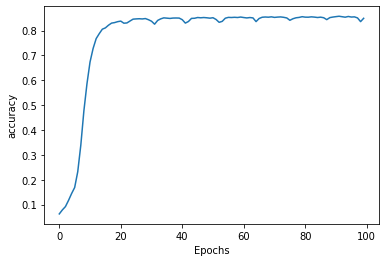

In [59]:
embedding_dim = 100
lstm_units = 1024
learning_rate = 0.01

model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units, dropout=0.1)),
          Dense(total_words, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
    )

history = model.fit(xs, ys, epochs=100)

plot_graphs(history, 'accuracy')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 15, 40)            107600    
                                                                 
 bidirectional_18 (Bidirecti  (None, 2048)             8724480   
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 2690)              5511810   
                                                                 
Total params: 14,343,890
Trainable params: 14,343,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
377/377 [==============================] - 10s 17ms/step - loss: 6.7607 - accuracy: 0.0580
Epoch 2/100
377/377 [==============================] - 7s 17ms/step - loss: 6.2854 - accuracy: 0.0718
Epoch 3/100
377/377 [=============

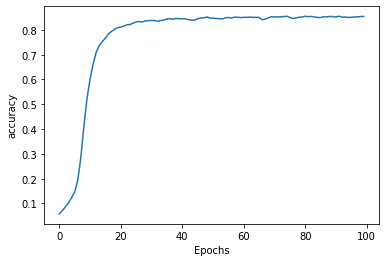

In [62]:
embedding_dim = 40
lstm_units = 1024
learning_rate = 0.001

model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units, dropout=0.1)),
          Dense(total_words, activation='softmax')
])

model.summary()

model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['accuracy']
    )

history = model.fit(xs, ys, epochs=100)

plot_graphs(history, 'accuracy')

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 15, 200)           538000    
                                                                 
 bidirectional_19 (Bidirecti  (None, 400)              641600    
 onal)                                                           
                                                                 
 dense_17 (Dense)            (None, 2690)              1078690   
                                                                 
Total params: 2,258,290
Trainable params: 2,258,290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
377/377 [==============================] - 6s 10ms/step - loss: 6.6799 - accuracy: 0.0740
Epoch 2/300
377/377 [==============================] - 3s 8ms/step - loss: 5.7477 - accuracy: 0.1138
Epoch 3/300
377/377 [=================

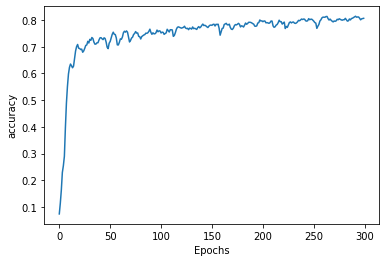

In [64]:
embedding_dim = 200
lstm_units = 200
learning_rate = 0.01

model = Sequential([
          Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),
          Bidirectional(LSTM(lstm_units, dropout=0.1)),
          Dense(total_words, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
    metrics=['accuracy']
    )

model.summary()

history = model.fit(xs, ys, epochs=300)

plot_graphs(history, 'accuracy')

# Generating Text

In [69]:
# Вихідний текст
seed_text = "help me obi-wan kinobi youre my only hope"

# Загальна кількість слів для прогнозування
next_words = 26

for _ in range(next_words):

	# Перетворення вихідного тексту на послідовність токенів
	token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Додавання послідовності
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Передавання в модель і отримання ймовірності для кожного токену
	probabilities = model.predict(token_list)

	# Отримання індексу з найбільшою ймовірністю
	predicted = np.argmax(probabilities, axis=-1)[0]

	# Ігнорування 0-токену
	if predicted != 0:
		
		# Пошук слова, пов’язаного з індексом
		output_word = tokenizer.index_word[predicted]

		# додавання слова
		seed_text += " " + output_word

print(seed_text)

1/1 [==============================] - 0s 16ms/step
help me obi-wan kinobi youre my only hope birds day and mother i shall be as fair lily again over gone by day before hes thou art there have thou only oer delight times


##### допоможи мені, обі-ван кенобі, ти моя єдина надія, день птахів і мати, я знову буду, як прекрасна лілія, що зникне за день, перш ніж ти будеш там, ти будеш лише в часи насолоди